In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

In [2]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download=True,
    transform = ToTensor()
)

testing_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.4MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.43MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.02MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
print(training_data.data.shape)

torch.Size([60000, 28, 28])


In [3]:
from fastai import *
from fastai.vision.all import *
from torchvision.transforms import ToPILImage

to_pil = ToPILImage()
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
searches =  "T-Shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"
path = Path("data1")

for o,i in labels_map.items():
  dest = (path/str(o))
  dest.mkdir(exist_ok = True , parents= True)

for i in range(len(training_data)):
  img , label = training_data[i]
  img = to_pil(img)
  dest = path/str(label)/f"{i}.png"
  img.save(dest)


In [23]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(len(failed))

0


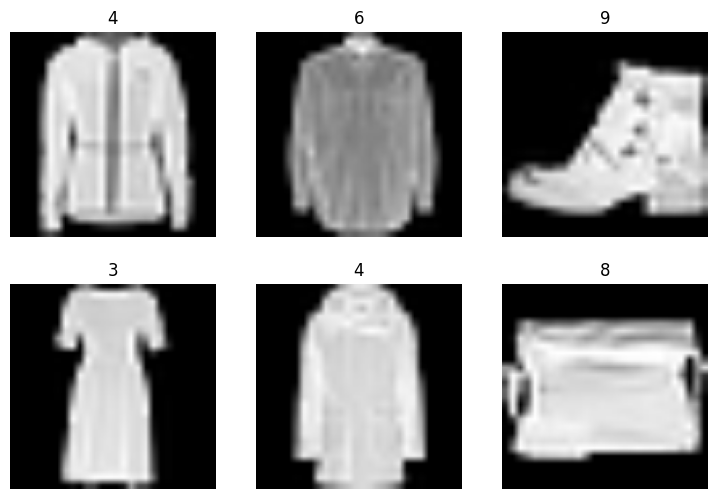

In [4]:
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2 , seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(128,method = "squish")]).dataloaders(path , bs = 64)


dls.show_batch(max_n=6)

In [5]:
learn= vision_learner(dls , resnet18 , metrics = error_rate)
learn.fine_tune(3)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 175MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.506494,0.402971,0.141917,01:56


epoch,train_loss,valid_loss,error_rate,time
0,0.294743,0.250620,0.092167,01:58
1,0.181063,0.181835,0.064917,01:58
2,0.079674,0.186933,0.060833,02:26


In [13]:
pred , _ , prob = learn.predict(PILImage.create("/content/data1/4/10355.png"))
print(pred)
print(max(prob))

4
tensor(0.9692)
